### Importing library and reading of hdf file

In [1]:
from satpy import Scene
from glob import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.image as img
import seaborn as sns
import math
import earthpy.plot as ep

In [2]:
filenames=glob('MYD021KM.A2023036.0830.061.2023036192418.hdf')
hdf = Scene(reader='modis_l1b', filenames=filenames)
hdf.available_dataset_names()

['1',
 '10',
 '11',
 '12',
 '13hi',
 '13lo',
 '14hi',
 '14lo',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'latitude',
 'longitude',
 'satellite_azimuth_angle',
 'satellite_zenith_angle',
 'solar_azimuth_angle',
 'solar_zenith_angle']

In [3]:
#im = img.imread('MYD021KM.A2023036.0830.061.2023036192418.hdf')
#plt.imshow(im);

#### DATE - 15 JAN 2023
#### TIME - 8:20 AM TO 8:25 AM
#### REGION- INDIAN OCEAN
#### LATITUDE 20S TO 0
#### LATITUDE 70E TO 95E

### Now Loading band '31'

* Band 31 is 11µm

In [4]:
hdf.load(['31'])
hdf['31'].attrs

{'file_type': 'hdf_eos_data_1000m',
 'name': '31',
 'resolution': 1000,
 'calibration': 'brightness_temperature',
 'coordinates': ('longitude', 'latitude'),
 'wavelength': WavelengthRange(min=10.78, central=11.03, max=11.28, unit='µm'),
 'modifiers': (),
 'units': 'K',
 'standard_name': 'toa_brightness_temperature',
 'platform_name': 'EOS-Aqua',
 'sensor': 'modis',
 'rows_per_scan': 10,
 'start_time': datetime.datetime(2023, 2, 5, 8, 30),
 'end_time': datetime.datetime(2023, 2, 5, 8, 35),
 'reader': 'modis_l1b',
 'area': <pyresample.geometry.SwathDefinition at 0x23dd78aadd0>,
 '_satpy_id': DataID(name='31', wavelength=WavelengthRange(min=10.78, central=11.03, max=11.28, unit='µm'), resolution=1000, calibration=<calibration.brightness_temperature>, modifiers=()),
 'ancillary_variables': []}

In [5]:
r_1=600
r_2=800
c_1=100
c_2=300

In [6]:
k1=hdf['31'].values
#k1=k1[r_1:r_2,c_1:c_2]
n,m=k1.shape
means1 = []
stds = []
for i in range(n):
    for j in range(m):
        if i == 0 and j == 0:
            slice = k1[:2,:2]
        elif i == 0 and j == m-1:
            slice = k1[:2,-2:]
        elif i == n-1 and j == 0:
            slice = k1[-2:,:2]
        elif i == n-1 and j == m-1:
            slice = k1[-2:,-2:]
        elif i == 0:
            slice = k1[:2,j-1:j+2]
        elif i == n-1:
            slice = k1[-2:,j-1:j+2]
        elif j == 0:
            slice = k1[i-1:i+2,:2]
        elif j == m-1:
            slice = k1[i-1:i+2,-2:]
        else:
            slice = k1[i-1:i+2,j-1:j+2]
        means1.append(np.mean(slice))
        stds.append(np.std(slice))

In [7]:
means2D = np.array(means1).reshape(2030,1354)
std2D = np.array(stds).reshape(2030,1354)

In [8]:
x_std = []

for i in range(std2D.shape[0]):
  for j in range(std2D.shape[1]):
    if std2D[i,j]>0.5 and means2D[i,j] <=290:
      x_std.append(k1[i,j])
    else:
      x_std.append(0)

In [9]:
x_std_2D = np.array(x_std).reshape(2030,1354)

In [10]:
k1=hdf['31'].values
#k1=k1[r_1:r_2,c_1:c_2]
T11=k1.flatten()
T11=np.array(T11).reshape(len(T11),1)
T11.shape

(2748620, 1)

In [11]:
hdf.load(['latitude'])
lat_w=hdf['latitude'].values
#lat=lat_w[r_1:r_2,c_1:c_2]
lat_w.min(), lat_w.max()

(-12.805832, 8.122009)

In [12]:
hdf.load(['longitude'])
lon_w=hdf['longitude'].values
#lon=lon_w[r_1:r_2,c_1:c_2]
lon_w.min(), lon_w.max()

(66.06634, 90.81698)

C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_1440\3184692247.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm = ax.pcolormesh(lon_w, lat_w, x_std_2D, cmap="jet")


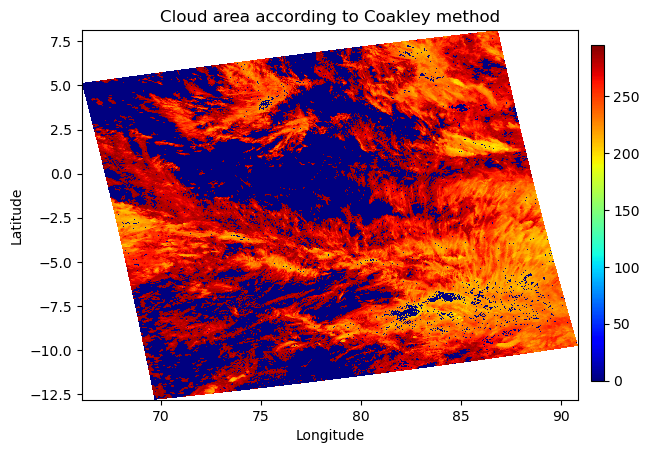

In [13]:
fig, ax = plt.subplots()

# Plot the variable using pcolormesh
pcm = ax.pcolormesh(lon_w, lat_w, x_std_2D, cmap="jet")


cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Add the color bar to the separate axes object
cbar = plt.colorbar(pcm, cax=cax)
# Set the title of the plot
ax.set_title("Cloud area according to Coakley method")

# Set the x and y labels of the plot
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

In [14]:
num_pixels = np.count_nonzero(np.array(x_std) == 0)


print(f'clear sky pixel according to Coakley method: {num_pixels}')

clear sky pixel according to Coakley method: 993028


In [15]:
909348/2748620

0.3308380205339407

In [16]:
hdf.load(['32'])
hdf['32'].attrs;

In [17]:
t_12=hdf['32'].values
#t_12=t_12[r_1:r_2,c_1:c_2]
T12=t_12.flatten()
T12=np.array(T12).reshape(len(T12),1)
T12.shape

(2748620, 1)

In [18]:
dTb=T11-T12
dTb.min()

-2.418213345649235

In [19]:
hdf.load(['3'])
hdf['3'].attrs
alp=hdf['3'].values
#alp=alp[r_1:r_2,c_1:c_2]
alpha=alp.flatten()
alpha=np.array(alpha).reshape(len(alpha),1)
alpha.shape

(2748620, 1)

In [20]:
X=np.concatenate((T11,dTb,alpha), axis=1) #alpha = albedo
X.shape

(2748620, 3)

In [21]:
X

array([[229.82842585,   2.12873111,  52.56806564],
       [231.8351643 ,   1.3892688 ,  54.36938477],
       [232.7801046 ,   0.97682311,  55.45536423],
       ...,
       [294.09399659,   1.60406971,  18.54689598],
       [294.25926264,   1.66472223,  18.59507942],
       [294.1961031 ,   1.6364246 ,  19.12509727]])

## K-Means

In [46]:
from sklearn.cluster import KMeans
import numpy as np
# Initialize KMeans with the number of clusters you want to create
kmeans = KMeans(n_clusters=9)

# Fit KMeans on the dataset
kmeans.fit(X)

# Get the cluster assignments for each data point
labelsk = kmeans.labels_

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_





E:\DS\envs\Mspace\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


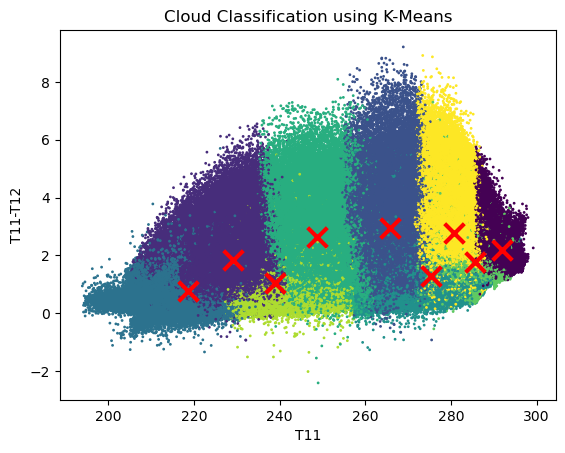

In [47]:
plt.scatter(X[:,0], X[:,1], c=labelsk,s=1)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, linewidths=3, color='r')
#plt.gca().invert_yaxis()
plt.title("Cloud Classification using K-Means")
plt.xlabel("T11")
plt.ylabel("T11-T12")
plt.show()
plt.show()

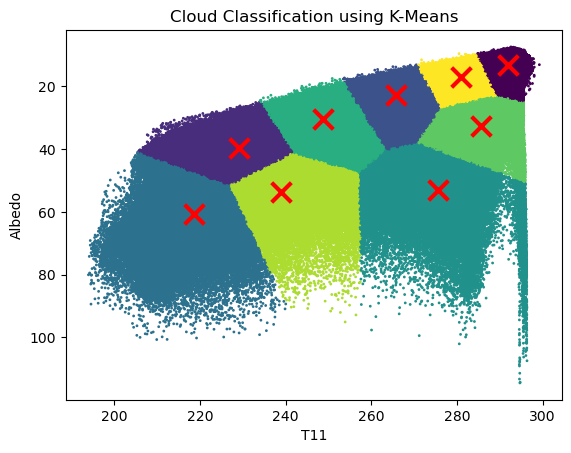

In [48]:
plt.scatter(X[:,0], X[:,2], c=labelsk,s=1)
plt.scatter(centroids[:,0], centroids[:,2], marker='x', s=200, linewidths=3, color='r')
plt.gca().invert_yaxis()
plt.title("Cloud Classification using K-Means")
plt.xlabel("T11")
plt.ylabel("Albedo")
plt.show()

In [49]:
sizes = np.bincount(labelsk)
s=0
sk=[]
for i, (center, size) in enumerate(zip(centroids, sizes)):
    s=s+size
    sk.append(size)
    print(f'Cluster {i+1}: center={center}, size={size}')
s

Cluster 1: center=[291.9139331    2.17952053  13.14022474], size=1115484
Cluster 2: center=[229.18359797   1.85426649  39.50325086], size=184349
Cluster 3: center=[265.84803613   2.93603249  22.80190562], size=316196
Cluster 4: center=[218.59336605   0.77071083  60.757044  ], size=129615
Cluster 5: center=[275.45026355   1.29481046  53.14677386], size=75826
Cluster 6: center=[248.6300013    2.62015107  30.5293917 ], size=245290
Cluster 7: center=[285.65084102   1.76362595  32.59880779], size=116437
Cluster 8: center=[238.91164801   1.0425605   53.5958712 ], size=104796
Cluster 9: center=[280.81680397   2.76497841  16.94233433], size=460627


2748620

In [50]:
sizes/2748620*100

array([40.58342004,  6.70696568, 11.50380918,  4.71563912,  2.75869345,
        8.92411465,  4.23619853,  3.81267691, 16.75848244])

In [51]:
#clustered_array

C:\Users\X1 Carbon\AppData\Local\Temp\ipykernel_1440\834417562.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")


Text(0, 0.5, 'Latitude')

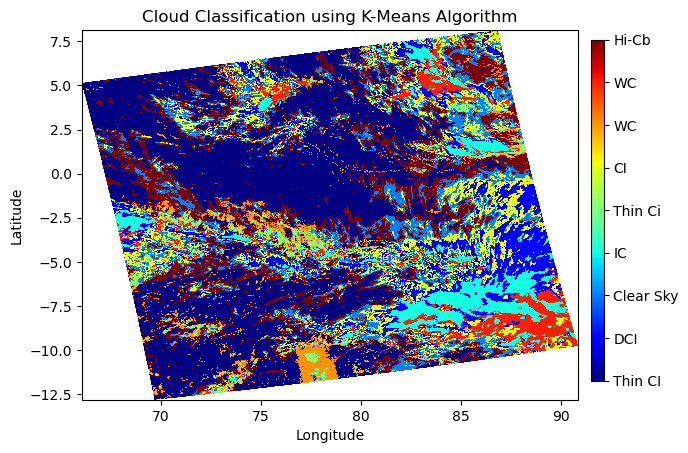

In [52]:
clustered_array=labelsk.reshape(2030,1354)
fig, ax = plt.subplots()

#Plot the variable using pcolormesh

pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")

#Define the cloud type names 
cloud_types=["Thin CI","DCI","Clear Sky","IC","Thin Ci","CI","WC","WC","Hi-Cb"]

cax = fig.add_axes([0.92, 0.15, 0.02, 0.71])

#Add the color bar to the separate axes object 
cbar = plt.colorbar (pcm, cax=cax, ticks=range (9)) 
#Set the tick labels to the cloud type names 
cbar.ax.set_yticklabels(cloud_types)

#Set the title of the plot 
ax.set_title("Cloud Classification using K-Means Algorithm")

#Set the x and y labels of the plot 
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

In [53]:
len(sk)

9

In [54]:
size

460627

In [55]:
cldk=["Thin CI","DCI","Clear Sky","IC","Thin Ci","CI","WC","WC","Hi-Cb"]

In [56]:
sk[0]=sk[0]+sk[4]
sk[6]=sk[6]+sk[8]
sk = np.delete(sk, (4,8))
cldk = np.delete(cldk, (4,8))

In [57]:
len(sk),len(cldk)

(7, 7)

Text(0.5, 1.0, 'No. of Pixel of different clound using Kmeans')

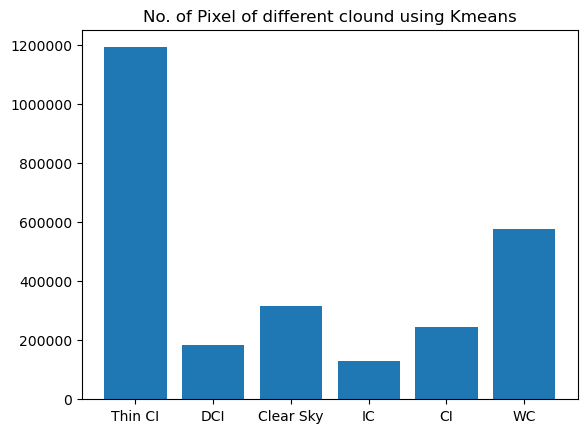

In [58]:
plt.bar(cldk,sk)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)  
plt.title("No. of Pixel of different clound using Kmeans") 

In [ ]:
np.array(sk)/2748620*100

## GMM

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np



gmm = GaussianMixture(n_components=9)


gmm.fit(X)

labelsg = gmm.predict(X)

centers = gmm.means_



In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labelsg, s=10)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=200, linewidths=3, color='r');
#plt.gca().invert_yaxis()
plt.title("Cloud Classification using GMM")
plt.xlabel("T11")
plt.ylabel("T11-T12")
plt.show()



In [ ]:
plt.scatter(X[:, 0], X[:, 2], c=labelsg, s=10)
plt.scatter(centers[:, 0], centers[:, 2], marker='x', s=200, linewidths=3, color='r');
plt.gca().invert_yaxis()
plt.title("Cloud Classification using GMM")
plt.xlabel("T11")
plt.ylabel("Albedo")
plt.show()



In [ ]:
sizes = np.bincount(labelsg)
s=0
sg=[]
for i, (center, size) in enumerate(zip(centers, sizes)):
    s=s+size
    sg.append(size)
    print(f'Cluster {i+1}: center={center}, size={size}')
s

In [ ]:
clustered_array=labelsg.reshape(2030,1354)
fig, ax = plt.subplots()

#Plot the variable using pcolormesh

pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")

#Define the cloud type names 
cloud_types=["Thin CI","DCi","Clear Sky","Thin Ci","WC","Hi Cb","WC","WC","IC"]
cax = fig.add_axes([0.92, 0.15, 0.02, 0.71])

#Add the color bar to the separate axes object 
cbar = plt.colorbar (pcm, cax=cax, ticks=range (9)) 
#Set the tick labels to the cloud type names 
cbar.ax.set_yticklabels(cloud_types)

#Set the title of the plot 
ax.set_title("Cloud Classification using GMM Algorithm")

#Set the x and y labels of the plot 
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

In [ ]:
cldg=["Thin CI","DCi","Clear Sky","Thin Ci","WC","Hi Cb","WC","WC","IC"]

In [ ]:
sg[0]=sg[0]+sg[3]
sg[4]=sg[4]+sg[6]+sg[7]
sg = np.delete(sg, (3,6,7))
cldg = np.delete(cldg, (3,6,7))

In [ ]:
plt.bar(cldg,sg)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title("No. of Pixel of different clound using GMM")

In [ ]:
np.array(sg)/2748620*100

## Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=9)


agg.fit(X)

# Get the predicted labels
labels = agg.labels_
centroids = np.zeros((9, X.shape[1]))
for i in range(9):
    centroids[i, :] = np.mean(X[labels == i, :], axis=0)
plt.scatter(X[:, 1], X[:, 0], c=labels,)
plt.scatter(centroids[:, 1], centroids[:, 0], marker='x', s=200, linewidths=3, color='r');
plt.gca().invert_yaxis()

plt.show()


In [ ]:
sizes = np.bincount(labels)
s=0
s10=[]
for i, (center, size) in enumerate(zip(centroids, sizes)):
    s=s+size
    s10.append(size)
    print(f'Cluster {i+1}: center={center}, size={size}')
s

## Fuzzy Clustering

In [ ]:
import skfuzzy as fuzz

n_clusters = 9
m = 2
error = 0.005
max_iter = 100

# Perform fuzzy c-means clustering
centroids, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, n_clusters, m, error, max_iter, init=None)




In [ ]:


labelsf = np.argmax(u, axis=0)
labelsf

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labelsf, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r');
#plt.gca().invert_yaxis()
plt.title("Cloud Classification using Fuzzy")
plt.xlabel("T11")
plt.ylabel("T11-T12")

plt.show()

In [ ]:
plt.scatter(X[:, 0], X[:, 2], c=labelsf, s=1)
plt.scatter(centroids[:, 0], centroids[:, 2], marker='x', s=200, linewidths=3, color='r');
plt.gca().invert_yaxis()
plt.title("Cloud Classification using Fuzzy")
plt.xlabel("T11")
plt.ylabel("Albedo")

plt.show()

In [ ]:
sizes = np.bincount(labelsf)
s=0
sf=[]
for i, (center, size) in enumerate(zip(centroids, sizes)):
    s=s+size
    sf.append(size)
    print(f'Cluster {i+1}: center={center}, size={size}')
s

In [ ]:
clustered_array=labelsf.reshape(2030,1354)
fig, ax = plt.subplots()

#Plot the variable using pcolormesh

pcm=ax.pcolormesh (lon_w, lat_w, clustered_array, cmap="jet")

#Define the cloud type names 
cloud_types=["Ci","Clear Sky","WC","Thin Ci","Thin Ci","Hi-Cb","WC","IC","DCi"]
cax = fig.add_axes([0.92, 0.15, 0.02, 0.71])

#Add the color bar to the separate axes object 
cbar = plt.colorbar (pcm, cax=cax, ticks=range (9)) 
#Set the tick labels to the cloud type names 
cbar.ax.set_yticklabels(cloud_types)

#Set the title of the plot 
ax.set_title("Cloud Classification using Fuzzy Algorithm")

#Set the x and y labels of the plot 
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

In [ ]:
cldf=["Ci","Clear Sky","WC","Thin Ci","Thin Ci","Hi-Cb","WC","IC","DCi"]

In [ ]:
sf[2]=sf[2]+sf[7]
sf[3]=sf[3]+sf[4]
sf = np.delete(sf, (4,7))
cldf = np.delete(cldf, (4,7))

In [ ]:
plt.bar(cldf,sf)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
plt.title("No. of Pixel of different clound using Fuzzy")

In [ ]:
sf/2748620*100

In [ ]:
plt.hist(alpha, bins=100, range=(0, 100))
plt.title('MODIS Albedo')
plt.xlabel('Albedo (%)')
plt.ylabel('Frequency')




plt.show()

In [ ]:
num_pixels = np.count_nonzero(alpha <= 12)


print(f'Number of pixels with albedo < 12%: {num_pixels}')

In [ ]:
125688/2748620*100